<a href="https://colab.research.google.com/github/sgr1118/NLP_basic/blob/main/_6_%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8%EB%A7%81(Topic_Modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [2]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle = True, random_state = 1, remove = ('headers', 'footers', 'quotes'))

documents = dataset.data

print(len(documents))
documents[3]

# 특수문자가 있는지 확인도 필요할 것으로 예상된다.

11314


'Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT\'s last product in this area (a) was priced over\n$1000, as I suspect \'clipper\' phones will be; (b) came to the customer \nwith the key automatically preregistered with government authorities. Thus,\naside from attempting to further legitimize and solidify the fed\'s posture,\nClipper seems to be "more of the same", rather than a new direction.\n   Yes, technology will eventually drive the cost down and thereby promote\nmore widespread use- but at present, the man on the street is not going\nto purchase a $1000 crypto telephone, especially when the guy on the other\nend probably doesn\'t have one anyway.  Am I missing something?\n   The real question is what the gov will do in a year or two when air-\ntight voice privacy on a phone line is as close as your nearest pc.  That\nhas got to a problematic scenario for them, even if the extent of usage\nnever surpasses the \'underground\' stature

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 3])

def preprocessing(d):
    return preprocess_string(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd

news_df = pd.DataFrame({'article': documents})

len(news_df)

11314

In [9]:
news_df.replace("", float('NaN'), inplace = True)
#news_df.isnull().values.any()
news_df.dropna(inplace = True)
print(len(news_df))

11096


In [12]:
news_df['article'] = news_df['article'].apply(clean_text)

In [13]:
news_df['article']

0        Well im not sure about the story nad it did se...
1        \n\n\n\n\n\n\nYeah do you expect people to rea...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well I will have to change the scoring on my p...
                               ...                        
11309    Danny Rubenstein an Israeli journalist will be...
11310                                                   \n
11311    \nI agree  Home runs off Clemens are always me...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          \nNo arg...
Name: article, Length: 11096, dtype: object

In [14]:
news_df['article'] = news_df['article'].apply(clean_stopword)

In [15]:
news_df['article']

0        well sure story seem biased disagree statement...
1        yeah expect people read actually accept hard a...
2        although realize principle strongest points wo...
3        notwithstanding legitimate fuss proposal much ...
4        well change scoring playoff pool unfortunately...
                               ...                        
11309    danny rubenstein israeli journalist speaking t...
11310                                                     
11311    agree home runs clemens always memorable kinda...
11312    used deskjet orange micros grappler system upd...
11313    argument murphy scared hell came last year han...
Name: article, Length: 11096, dtype: object

In [16]:
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()

In [ ]:
tokenized_news

In [18]:
import numpy as np
drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0)
print(len(news_texts))

10926


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## Gensim을 이용한 토픽 모델링

In [19]:
from gensim import corpora

dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]

print(corpus[1])

[(50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)]


### 잠재 의미 분석을 위한 `LsiModel`

In [ ]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics = 20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

In [21]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_score = []

for num_topics in range(min_topics, max_topics):
    model = LsiModel(corpus, num_topics = num_topics, id2word=dictionary)
    coherence = CoherenceModel(model = model,
                               texts = news_texts,
                               dictionary = dictionary)
    coherence_score.append(coherence.get_coherence())

print(coherence_score)

[0.44803482078797197, 0.4068038884724225, 0.41423530277389653, 0.45603121668179897, 0.4666683175171342]


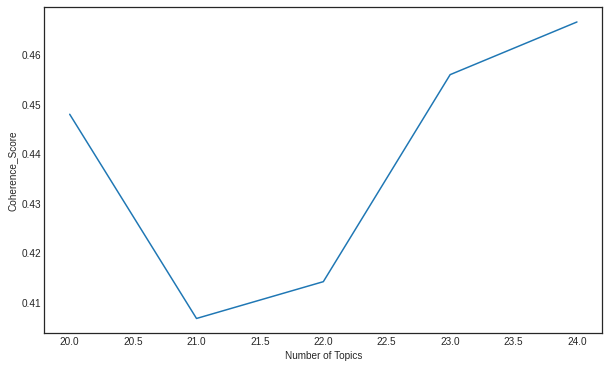

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [i for i in range(min_topics, max_topics)]

plt.figure(figsize = (10,6))
plt.plot(x, coherence_score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence_Score')

plt.show()

In [26]:
# Coherence_Socre가 가장 높은 토픽을 기준으로 출력한다.

lsi_model = LsiModel(corpus, num_topics = 24, id2word = dictionary)
topics = lsi_model.print_topics(num_topics = 24)
topics

[(0,
  '-1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + -0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + -0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + -0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + -0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"'),
 (1,
  '0.393*"file" + 0.191*"program" + 0.158*"imag" + 0.126*"peopl" + 0.125*"avail" + 0.119*"inform" + 0.116*"includ" + 0.116*"entri" + 0.114*"work" + 0.112*"dont"'),
 (2,
  '0.456*"file" + -0.215*"peopl" + -0.210*"know" + -0.192*"said" + -0.176*"dont" + 0.158*"entri" + -0.158*"think" + -0.153*"stephanopoulo" + 0.139*"imag" + -0.129*"go"'),
 (3,
  '-0.409*"file" + -0.286*"entri" + 0.241*"imag" + 0.168*"avail" + 0.141*"wire" + 0.136*"data" + 0.122*"version" + -0.116*"onam" + 0.109*"window" + -0.104*"said"'),
 (4,
  '0.618*"wire" + 0.250*"ground" + 0.188*"

### 잠재 디리클레 할당을 위한 `LdaModel`

In [27]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics = 20, id2word = dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.154*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.003*"comic" + 0.003*"copi" + 0.002*"cover" + 0.002*"annual" + 0.002*"hulk" + 0.002*"uudecod" + 0.002*"ghost" + 0.002*"spiderman" + 0.002*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv"'),
 (1,
  '0.008*"like" + 0.007*"dont" + 0.006*"chip" + 0.006*"govern" + 0.006*"encrypt" + 0.005*"think" + 0.005*"peopl" + 0.005*"good" + 0.005*"know" + 0.004*"want"'),
 (2,
  '0.009*"sleev" + 0.007*"pictur" + 0.007*"water" + 0.004*"trade" + 0.004*"plant" + 0.004*"clemen" + 0.003*"boston" + 0.003*"work" + 0.003*"dont" + 0.003*"promopictur"'),
 (3,
  '0.010*"peopl" + 0.006*"state" + 0.006*"kill" + 0.005*"church" + 0.005*"public" + 0.004*"like" + 0.004*"crimin" + 0.004*"govern" + 0.004*"time" + 0.004*"right"'),
 (4,
  '0.016*"team" + 0.011*"game" + 0.010*"year" + 0.007*"plai" + 0.007*"leagu" + 0.006*"season" + 0.006*"player" + 0.006*"good" + 0.006*"time" + 0.005*"defens"'),
 (5,
  '0.012*"pain" + 0.011*"diseas" + 0.007*"medic" + 0.007*"patient" + 0.007*"infect" + 0.005

In [30]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_score = []

for num_topics in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics = num_topics, id2word=dictionary)
    coherence = CoherenceModel(model = model,
                               texts = news_texts,
                               dictionary = dictionary)
    coherence_score.append(coherence.get_coherence())

print(coherence_score)

[0.49023109541591714, 0.4913890225906337, 0.5143575976769126, 0.4938495647367077, 0.48331926616685456]


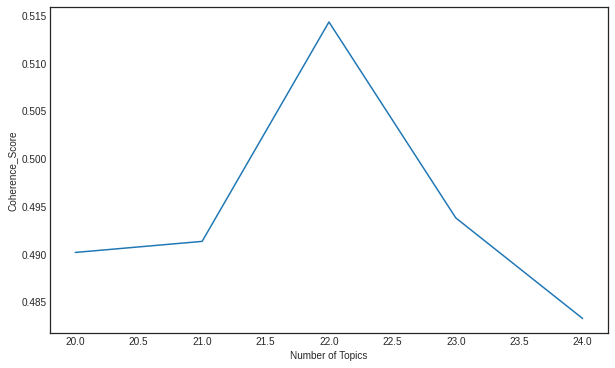

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [i for i in range(min_topics, max_topics)]

plt.figure(figsize = (10,6))
plt.plot(x, coherence_score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence_Score')

plt.show()

In [33]:
lda_model = LdaModel(corpus, num_topics = 23 , id2word = dictionary)
topics = lda_model.print_topics(num_topics = 22)
topics

[(4,
  '0.012*"peopl" + 0.009*"dont" + 0.009*"govern" + 0.009*"know" + 0.008*"think" + 0.008*"encrypt" + 0.007*"secur" + 0.006*"chip" + 0.006*"want" + 0.006*"public"'),
 (0,
  '0.008*"time" + 0.007*"like" + 0.006*"peopl" + 0.005*"dont" + 0.005*"problem" + 0.005*"think" + 0.005*"health" + 0.005*"know" + 0.004*"year" + 0.004*"work"'),
 (6,
  '0.006*"year" + 0.005*"turkish" + 0.005*"russian" + 0.004*"time" + 0.004*"million" + 0.004*"offic" + 0.004*"space" + 0.004*"presid" + 0.004*"state" + 0.004*"number"'),
 (19,
  '0.008*"line" + 0.006*"thank" + 0.006*"email" + 0.006*"winner" + 0.006*"program" + 0.005*"number" + 0.005*"info" + 0.005*"onam" + 0.005*"post" + 0.005*"draw"'),
 (21,
  '0.019*"wire" + 0.017*"ground" + 0.011*"myer" + 0.008*"outlet" + 0.008*"connect" + 0.006*"borland" + 0.005*"clemen" + 0.004*"hash" + 0.004*"circuit" + 0.004*"gfci"'),
 (7,
  '0.009*"like" + 0.008*"right" + 0.006*"peopl" + 0.006*"know" + 0.006*"work" + 0.006*"dont" + 0.006*"time" + 0.005*"think" + 0.004*"good" + 

## 토픽 모델링 시각화

In [34]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c571f64a4d04de0079b6f4c92749130bdf303a0962b0e903692b9c483f289537
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=427fe6f2daf370db9062b7858931b943489688ac098403fe75a0dc436783847d
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [35]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model,corpous, dictionary) 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary) # colab 모듈이 변경 이슈로 인하여 코드 수정
pyLDAvis.display(vis)

# 겹치지 않는 토픽 모음은 주제가 겹치지 않는다는 것을 뜻한다.

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
